In [31]:
from joblib import load
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import altair as alt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN

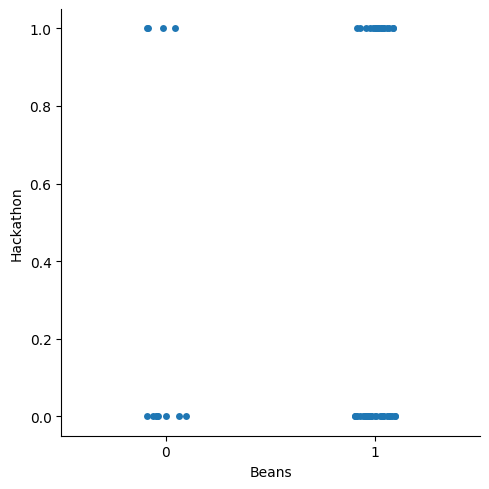

In [34]:
data = pd.read_csv("data.csv")
data = data.drop("Name", axis=1)
data.describe().T
sns.catplot(data=data, x="Beans", y="Hackathon")

#important findings: age 12-21, exp mean = 5

In [37]:

y = data["Hackathon"]
X = data.drop("Hackathon", axis = 1)

X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.80, 
    random_state = 1)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test).round(3)

-0.049

In [43]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
cv = StratifiedKFold(5, shuffle=True)

y = data["Hackathon"]
X = data.drop("Hackathon", axis = 1)

X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.60, 
    random_state = 1)

print(type(y_test))
print(np.unique(y_test))

for i in range(6):
  if i == 0: 
    clf = RidgeClassifier()
    name="ridge"
  if i == 1: 
    clf = svm.SVC()
    name="svm"
  if i == 2: 
    clf = GaussianNB()
    name="gaus"
  if i == 3: 
    clf = tree.DecisionTreeClassifier()
    name="tree"
  if i == 4:
    clf = RandomForestClassifier(n_estimators=10)
    name="randomforest"
  if i == 5: 
    clf = KNeighborsClassifier(n_neighbors=3)
    name="knn"

  pipe = make_pipeline(StandardScaler(), clf)
  # Fit model to training data


  # Fit model to training data
  pipe.fit(X_train, y_train)

  # Predict facies on training data
  y_pred = pipe.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(y_pred)
  print(f"Accuracy: {accuracy:.2f}")

<class 'pandas.core.series.Series'>
[0 1]
[1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1]
Accuracy: 0.60
[1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1]
Accuracy: 0.56
[1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1]
Accuracy: 0.60
[1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1]
Accuracy: 0.64
[1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1]
Accuracy: 0.64
[1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1]
Accuracy: 0.64


In [103]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
def knn_comparison(data, k):
  y = data["Hackathon"]
  X = data[["Age", "Exp", "Langs", "Beans", "Glasses", "Git", "Lang", "Start"]]

  X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.80, 
    random_state = 1)
  clf = KNeighborsClassifier(n_neighbors=k)
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(X_train, y_train)

  # Predict facies on training data
  y_pred = pipe.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
for i in range(1,30):
    knn_comparison(data, i)

0.7692307692307693
0.7692307692307693
0.7692307692307693
0.6153846153846154
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6153846153846154
0.38461538461538464
0.5384615384615384
0.5384615384615384
0.46153846153846156
0.46153846153846156
0.38461538461538464
0.3076923076923077
0.38461538461538464
0.38461538461538464
0.38461538461538464
0.38461538461538464
0.38461538461538464
0.23076923076923078
0.46153846153846156
0.3076923076923077
0.46153846153846156
0.38461538461538464
0.5384615384615384
0.5384615384615384
0.6153846153846154
0.5384615384615384
